# Pymaceuticals Inc.
---

 

In [15]:
# Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mousePath = "data/Mouse_metadata.csv"
studyPath = "data/Study_results.csv"

mouseData = pd.read_csv(mousePath)
studyData = pd.read_csv(studyPath)

# Left merge dataframes using mouse ID keys
completeData = pd.merge(studyData, mouseData, how="left", on="Mouse ID")
completeData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Counts unique Mouse ID's 
completeData[["Mouse ID"]].nunique()

Mouse ID    249
dtype: int64

In [17]:
# Returns every row with duplicated Mouse ID and Timepoint values
completeData[completeData[["Mouse ID", "Timepoint"]].duplicated(keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Drops mouse ID with duplicated data
cleanedData = completeData.drop(completeData[completeData["Mouse ID"] == "g989"].index)
cleanedData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Counts unique Mouse ID's in cleaned dataframe
cleanedData[["Mouse ID"]].nunique()

Mouse ID    248
dtype: int64

# Summary Statistics

In [360]:
# Groups data by drug, then creates dataframe from group summary stats
drugGroup = cleanedData.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drugData = pd.DataFrame({
    "Mean Tumor Volume": drugGroup.mean(),
    "Median Tumor Volume": drugGroup.median(),
    "Tumor Volume Variance": drugGroup.var(),
    "Tumor Volume Std. Dev.": drugGroup.std(),
    "Tumor Volume Std. Err.": drugGroup.sem()})
drugData

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Uses aggregation to produce summary stats in one line 
cleanedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

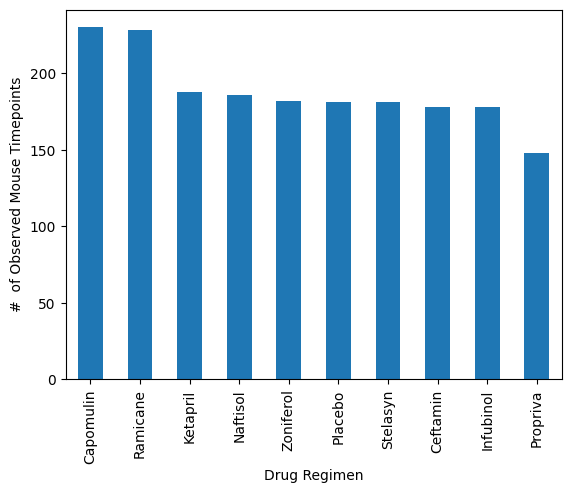

In [22]:
# Counts and sorts grouped rows, then creates pandas bar plot
drugCount = drugGroup.count().sort_values(ascending=False)
drugPandasChart = drugCount.plot.bar(ylabel= "#  of Observed Mouse Timepoints")

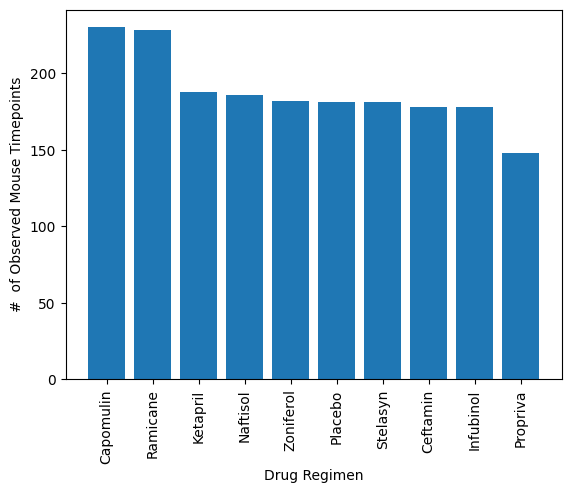

In [23]:
# Uses sorted drugCount to create pyplot bar plot
plt.bar(drugCount.keys(), drugCount)
plt.xlabel("Drug Regimen")
plt.ylabel("#  of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

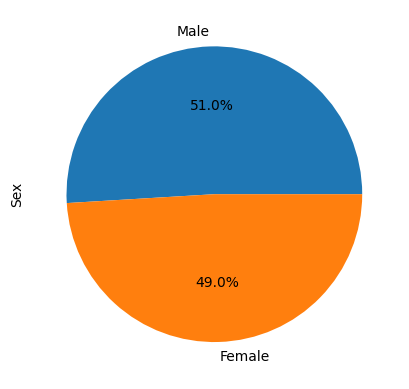

In [24]:
# Caluclates sex percentage, then plots pandas pie chart
sexData = cleanedData["Sex"].value_counts(normalize=True)
sexPandasChart = sexData.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")

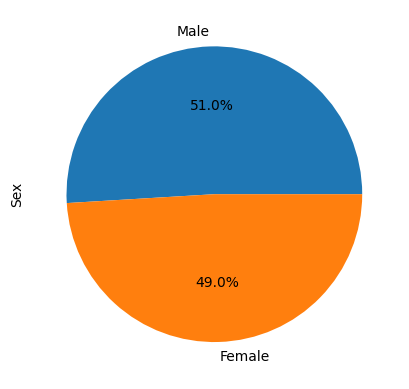

In [25]:
# Uses calucalted sex percentage to create pyploy pie chart
plt.pie(sexData, labels=["Male", "Female"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots


In [39]:
# Groups Mouse ID by the final occurance (sorted by timepoint)
# Creates new data frame from mouse data at final timepoint
lastTime = cleanedData.groupby("Mouse ID")[["Mouse ID", "Timepoint"]].tail(1).reset_index(drop=True)
lastTimeClean = pd.merge(cleanedData, lastTime)
lastTimeClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [202]:
# Initialize name and data lists.
drugNames = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]
drugVolList = []

# Creates list of each drugs' tumor volume and appends to total list
# Calculates quantiles, iqr, and possible outliers
# Prints results based on truthyness of outliers list
for drug in drugNames:
    drugVol = lastTimeClean.loc[lastTimeClean["Drug Regimen"] == drug]["Tumor Volume (mm3)"] 
    drugVolList.append(drugVol.tolist())

    quartiles = drugVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = [x for x in drugVol if (x > upper_bound) | (x < lower_bound)]

    if outliers:
        print(f'{drug}\'s potential outliers: {outliers}')
    else:
        print(f'{drug} has no potential outliers')


Capomulin has no potential outliers
Ramicane has no potential outliers
Infubinol's potential outliers: [36.3213458]
Ceftamin has no potential outliers


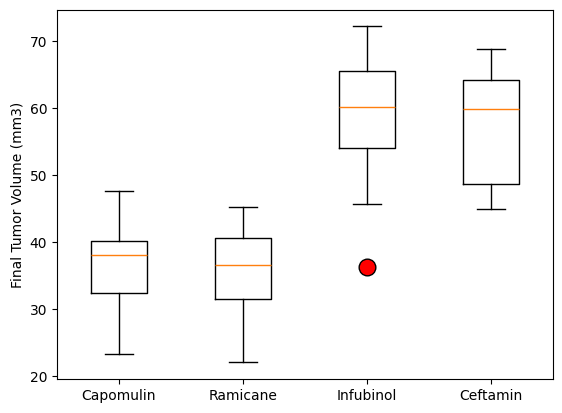

In [242]:
# Create pyplot boxplot from drugVolList subsets
plt.boxplot(drugVolList, flierprops=dict(markersize=12, markerfacecolor="red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], labels=drugNames)
plt.show()

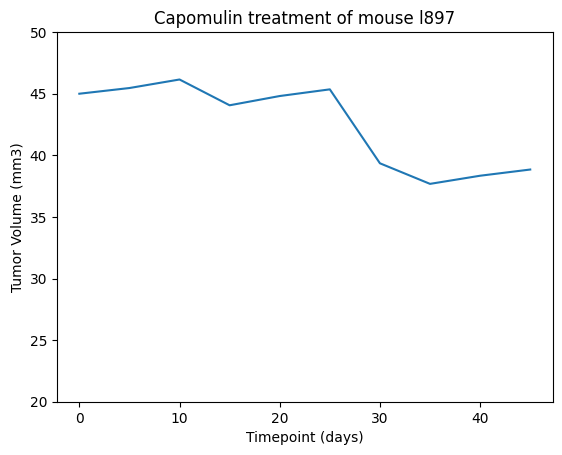

In [361]:
# Selects random capomulin mouse and takes it's ID as a string
# Sets axes to random mouse data
# Sets ylim based on Capomulin min/max values
randomMouse = cleanedData.loc[cleanedData["Drug Regimen"] == "Capomulin"]["Mouse ID"].sample(n=1).iloc[0]

xAxis = cleanedData.loc[cleanedData["Mouse ID"] == randomMouse]["Timepoint"]
yAxis = cleanedData.loc[cleanedData["Mouse ID"] == randomMouse]["Tumor Volume (mm3)"]

plt.plot(xAxis, yAxis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20, 50)
plt.title(f'Capomulin treatment of mouse {randomMouse}')
plt.show()

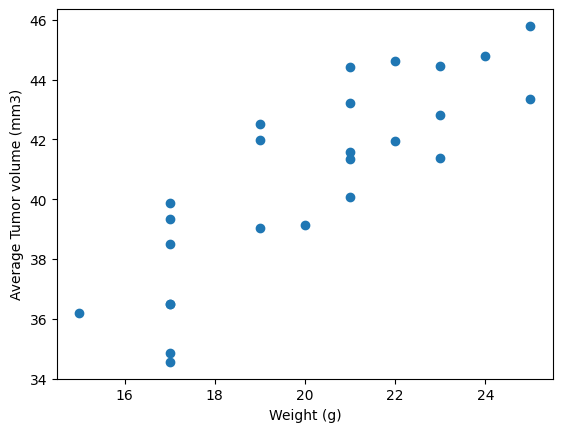

In [414]:
# Filter Capomulin mice, then create groups on weight and tumor volume
# Since weight is static, mean is used to properly reduce group
capoData = cleanedData.loc[cleanedData["Drug Regimen"] == "Capomulin"]

xScatter = capoData.groupby("Mouse ID")["Weight (g)"].mean()
yScatter = capoData.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(xScatter, yScatter)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


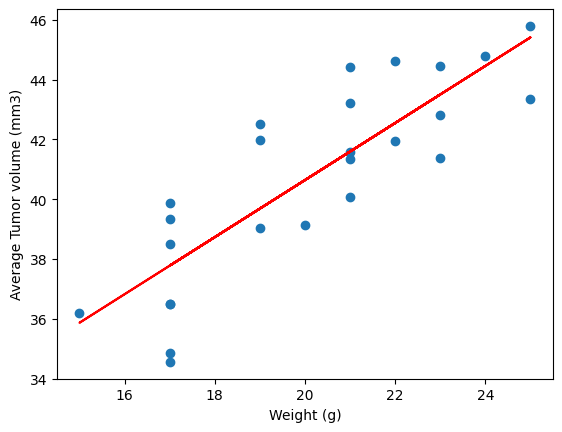

In [438]:
# Calculates linear regression model, f prints correlation coefficient, and adds fit to scatter
slope, inter, r, p, se = st.linregress(xScatter, yScatter)
fit = slope * xScatter + inter

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(r, 2)}")

plt.scatter(xScatter, yScatter)
plt.plot(xScatter, fit, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()